In [1]:
import os
# import matplotlib.pyplot as plt
import time
import pandas as pd

inputData = pd.read_csv("https://s3-us-west-2.amazonaws.com/jeremystorage/cableCo100k.csv", delimiter = ",")
inputData = inputData.drop(['billingpin'],axis=1)
print(inputData.columns)
print(inputData.dtypes)
# x = [print(x, inputData[x].unique()) for x in inputData.columns]

numericCols = [x for x in inputData.columns if inputData[x].dtypes in ["float64", "int64"]]
labelCol = "billing"
numericCols.remove(labelCol)
catCols = [x for x in inputData.columns if x not in numericCols]
catCols.remove(labelCol)

print(numericCols)
print(catCols)

inputData.head()


Index(['currentbalance', 'daysdelinquent', 'previousdueamount',
       'previouspaymentamount', 'statmentbalance', 'cardpaymentrestricted',
       'bankpaymentrestricted', 'existingrecurringpaymentonaccount',
       'balancedue', 'pastduebalance', 'pendingpaymentamount',
       'projectedbalancedue', 'recentpaymentamount', 'statementbalance',
       'outageflag', 'install', 'broadcastfunction', 'boradcaststatus',
       'cancelledappt', 'anilearning', 'accountstatus', 'nonpaydiscoii',
       'delinq_days', 'billing', 'due_diff', 'prev_pay_diff', 'bal_due_diff',
       'past_due_diff', 'rec_pay_diff', 'promise_diff'],
      dtype='object')
currentbalance                       float64
daysdelinquent                         int64
previousdueamount                    float64
previouspaymentamount                float64
statmentbalance                      float64
cardpaymentrestricted                   bool
bankpaymentrestricted                   bool
existingrecurringpaymentonaccount     

,currentbalance,daysdelinquent,previousdueamount,previouspaymentamount,statmentbalance,cardpaymentrestricted,bankpaymentrestricted,existingrecurringpaymentonaccount,balancedue,pastduebalance,...,accountstatus,nonpaydiscoii,delinq_days,billing,due_diff,prev_pay_diff,bal_due_diff,past_due_diff,rec_pay_diff,promise_diff
0,203.50,0,0.00,160.04,0.00,False,False,False,160.08,0.00,...,ACTIVE,0,0,1,7,-31,7,-9999,-9999,-9999
1,139.62,0,0.00,249.84,389.46,False,False,False,389.46,0.00,...,ACTIVE,0,0,0,13,-1,13,-9999,-9999,-9999
2,556.25,52,279.25,285.00,556.25,False,False,False,556.25,279.25,...,ACTIVE,52,30,0,6,-31,6,-9999,-9999,-9999
3,88.58,0,0.00,19.99,19.99,False,False,True,19.99,0.00,...,ACTIVE,0,0,0,-3,-32,-2,-9999,-9999,-9999
4,414.32,52,200.52,447.12,414.32,False,False,False,414.32,200.52,...,ACTIVE,52,30,0,6,-62,6,-9999,-9999,-9999


In [3]:
#############PIPELINE EXAMPLE
#############DOESNT WORK FOR MIXED TYPES :(


from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, LabelBinarizer, MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing   
import numpy as np




def get_text_cols(x):
    return np.array(x[catCols].astype(str))

def get_num_cols(x):
    return np.array(x[numericCols])

get_text_cols(inputData)
preprocessor = make_union(
    make_pipeline(
        FunctionTransformer(get_num_cols, validate=False),
        StandardScaler(),
    )
    ,
    make_pipeline(
        FunctionTransformer(get_text_cols, validate=False), LabelEncoder(), MultiLabelBinarizer()
       )
)

# preprocessor.fit(inputData)

# newData = preprocessor.transform(inputData)

# newData

# binar = LabelEncoder()

# catData = get_text_cols(inputData)

# pl = Pipeline()
# mlb = MultiLabelBinarizer().fit_transform(catData)
# mlb.shape
# len(catCols)
# cc.apply(OneHotEncoder().fit_transform)

# get_text_cols(np.array(inputData))


In [73]:
import json
len(inputData)
# json.loads(str(inputData[:1].to_dict(orient='records')[0]))
json.dumps(json.loads(inputData.to_json(orient='records'))[0])


'{"pendingpaymentamount": 0.0, "anilearning": "NOT_FOUND", "broadcastfunction": "Array", "currentbalance": 203.5, "install": "false", "previousdueamount": 0.0, "projectedbalancedue": 160.08, "previouspaymentamount": 160.04, "daysdelinquent": 0, "existingrecurringpaymentonaccount": false, "cancelledappt": "false", "statmentbalance": 0.0, "outageflag": "false", "recentpaymentamount": 160.04, "rec_pay_diff": -9999, "accountstatus": "ACTIVE", "nonpaydiscoii": 0, "promise_diff": -9999, "statementbalance": 0.0, "balancedue": 160.08, "pastduebalance": 0.0, "delinq_days": 0, "cardpaymentrestricted": false, "boradcaststatus": "NOT_FOUND", "bankpaymentrestricted": false, "prev_pay_diff": -31, "past_due_diff": -9999, "due_diff": 7, "bal_due_diff": 7, "billing": 1}'

In [2]:
################# Create balanced dataset... just for example
import numpy as np

def balanced_subsample(y, size=None):

    subsample = []

    if size is None:
        n_smp = y.value_counts().min()
    else:
        n_smp = int(size / len(y.value_counts().index))

    for label in y.value_counts().index:
        samples = y[y == label].index.values
        index_range = range(samples.shape[0])
        indexes = np.random.choice(index_range, size=n_smp, replace=False)
        subsample += samples[indexes].tolist()

    return subsample

ind = balanced_subsample(inputData['billing'])

inputData = inputData.loc[inputData.index.isin(ind)]

len(np.array(inputData)[0])
# inputData

30

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

inputData = inputData.dropna()

def catTransform(column):
    le = preprocessing.LabelEncoder()
    labeled = le.fit_transform(inputData[column].apply(str))
    labeled = [[x] for x in labeled]
    enc = OneHotEncoder(sparse = False)
    enc.fit_transform(labeled)
    oHot = enc.transform(labeled)
    return(column, oHot, le, enc)

catTransform("anilearning")

catTransformed = [catTransform(x) for x in catCols]
catTransformed[0]



    

('cardpaymentrestricted', array([[ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        ..., 
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.]]), LabelEncoder(), OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
        handle_unknown='error', n_values='auto', sparse=False))

In [4]:
import pickle

def largeFilter(x, value):
    if x > value:
        value
    else:
        x
        
import numpy as np
def contTransform(column):
    try:
        ss = preprocessing.StandardScaler()
        ssfit = ss.fit_transform(inputData[column])
        return(column, ssfit, ss)
    except:
        print(column, inputData[column])

contTransform("nonpaydiscoii")

contTransformed = [contTransform(x) for x in numericCols]



dataFlat = []

for x in contTransformed:
    dataFlat.append(x[1])

    
    
def flat2gen(alist):
    for item in alist:
        if isinstance(item, list):
            for subitem in item: yield subitem
        else:
            yield item

    
for x in catTransformed:
    l = x[1].tolist()
    dataFlat.append(l)

dataFlat = zip(*dataFlat)


dataFlat = [list(x) for x in dataFlat]


C:\Users\jswortz\AppData\Local\Continuum\Anaconda3\envs\threeFive\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\jswortz\AppData\Local\Continuum\Anaconda3\envs\threeFive\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\jswortz\AppData\Local\Continuum\Anaconda3\envs\threeFive\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it c

In [9]:
# SAVE STUFF HERE
import pickle
####TRANSFORM FUNCTION
###TRANSFORM FUNCTION

def catScore(labelEnc, oneHot, column, data=inputData):
    labeled = labelEnc.transform(data[column].apply(str))
    labeled = [[x] for x in labeled]
    return oneHot.transform(labeled)

def contScore(stScale, column, data=inputData):
    return stScale.fit(data[column])

saveConts = [[x[0], x[2]] for x in contTransformed]

saveCats = [[x[0], x[2], x[3]] for x in catTransformed]

saveObj = [saveConts, saveCats]

with open('kerasTransformersNew.pkl', 'wb') as output:
    pickle.dump(saveObj, output, pickle.HIGHEST_PROTOCOL)

In [5]:
df = []
for line in dataFlat:
    test = [x for x in flat2gen(line)]
    df.append(test)

    
print(len(df))
print(len(df[0]))

dataFlat = df
# inputData[10]
# [item for sublist in l for item in sublist]

26450
47


In [6]:
y = np.array(inputData[labelCol])
y
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

xFlatTrain, xFlatTest, yTrain, yTest = train_test_split(dataFlat, y, test_size = 0.2, random_state = 111)

from sklearn.svm import SVC
clf = SVC(probability=True)

model = clf.fit(xFlatTrain, yTrain) 


In [7]:
import sklearn.metrics
yPred = model.predict(xFlatTest)

print(confusion_matrix(yTest, yPred))
print("accuracy")
print(sklearn.metrics.accuracy_score(yTest, yPred))
print("recall")
print(sklearn.metrics.recall_score(yTest, yPred))
print("precision")
print(sklearn.metrics.precision_score(yTest, yPred))

[[1932  703]
 [ 881 1774]]
accuracy
0.70056710775
recall
0.668173258004
precision
0.716188938232


In [8]:
with open('sklearnSVCVanilla.pkl', 'wb') as output:
    pickle.dump(model, output, pickle.HIGHEST_PROTOCOL)

In [13]:
# Import `Sequential` from `keras.models`
import keras
from keras.models import Sequential
# Import `Sequential` from `keras.models`
from keras import regularizers
# import h5py as dklfjl

# Import `Dense` from `keras.layers`
from keras.layers import Dense, Dropout, Maximum, Flatten

# Initialize the constructor
model = Sequential()

print(np.array(dataFlat).shape)

# Add an input layer 
model.add(Dense(47, activation='linear', input_shape=(47,),  kernel_regularizer=regularizers.l2(0.1)))

# Add one hidden layer 
# model.add(Dropout(0.5))
model.add(Dense(20, activation='linear', kernel_regularizer=regularizers.l2(0.1)))

# model.add(Dense(200, activation='relu', kernel_regularizer=regularizers.l2(0.1)))

# model.add(Dense(200, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
# # Add one hidden layer 
# model.add(Dense(150, activation='tanh'))
# # Add one hidden layer 
# # model.add(Dropout(0.1))
# model.add(Dense(120, activation='relu'))
# # Add one hidden layer 
# # model.add(Dropout(.1))
# model.add(Dense(2, activation='softmax'))

# model.add(Dense(1000, trainable=True, init='he_normal', activation='relu', 
#                 W_regularizer=regularizers.l2(0.1)))
# model.add(Dropout(0.5))
# model.add(Dense(256, trainable=True, init='he_normal', activation='linear', 
#                 W_regularizer=regularizers.l2(0.1)))
# model.add(Dense(80, activation='tanh'))
# model.add(Dense(12, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, activation='softmax'))


tbCB = keras.callbacks.TensorBoard(log_dir='c:\\users\\Jeremy\\logs', histogram_freq=0, write_graph=True, 
                            write_images=True, embeddings_freq=0, embeddings_layer_names=None, 
                            embeddings_metadata=None)
tbCB.set_model(model)
# Model output shape
print(model.outputs)

# Model summary
print(model.summary)

# Model config
print(model.get_config())

# List all weight tensors 
model.get_weights()

(26450, 47)
[<tf.Tensor 'dense_7/Sigmoid:0' shape=(?, 1) dtype=float32>]
<bound method Container.summary of <keras.models.Sequential object at 0x00000000231DF1D0>>
[{'config': {'trainable': True, 'units': 47, 'kernel_initializer': {'config': {'seed': None, 'mode': 'fan_avg', 'distribution': 'uniform', 'scale': 1.0}, 'class_name': 'VarianceScaling'}, 'use_bias': True, 'kernel_constraint': None, 'activity_regularizer': None, 'activation': 'linear', 'kernel_regularizer': {'config': {'l1': 0.0, 'l2': 0.10000000149011612}, 'class_name': 'L1L2'}, 'bias_initializer': {'config': {}, 'class_name': 'Zeros'}, 'batch_input_shape': (None, 47), 'bias_regularizer': None, 'name': 'dense_5', 'bias_constraint': None, 'dtype': 'float32'}, 'class_name': 'Dense'}, {'config': {'units': 20, 'kernel_initializer': {'config': {'seed': None, 'mode': 'fan_avg', 'distribution': 'uniform', 'scale': 1.0}, 'class_name': 'VarianceScaling'}, 'bias_constraint': None, 'name': 'dense_6', 'kernel_constraint': None, 'activi

[array([[-0.01744074, -0.2067862 , -0.13004673, ...,  0.22604251,
          0.12052622, -0.23404127],
        [-0.14982176, -0.11989357, -0.20355445, ..., -0.12788559,
          0.11667162,  0.20737103],
        [-0.24255247,  0.2109457 , -0.18335891, ...,  0.02039251,
         -0.11694607, -0.10833493],
        ..., 
        [-0.21827538, -0.02218759, -0.08207531, ..., -0.16810833,
          0.10599616, -0.11166945],
        [ 0.02965635, -0.15594795,  0.18923849, ..., -0.13912186,
         -0.00571917, -0.05503304],
        [ 0.05225524, -0.06998493, -0.0176235 , ..., -0.20841798,
         -0.04308   , -0.21003084]], dtype=float32),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32),
 array([[  7.50052631e-02,   2.19510555e-01,   9.15490389e-02,
          

In [14]:

optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.00, decay=0.0, nesterov=False)


model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
oneWeight = (1 - np.mean(yTrain)) / np.mean(yTrain) #force to 5050
# zeroWeight = .5 / (1-np.mean(yTrain))
class_weight = {0 : 1, 1: oneWeight}
print(class_weight)
print("Have to beat this accuracy")
# print(sklearn.metrics.accuracy_score(yTest, yPred))

history = model.fit(xFlatTrain, yTrain,epochs=500, batch_size=1000, verbose=1, 
           validation_split=0.1, class_weight = class_weight)

{0: 1, 1: 1.0072092582052738}
Have to beat this accuracy
Train on 19044 samples, validate on 2116 samples
Epoch 1/500
19044/19044 [==============================] - 0s - loss: 7.6100 - acc: 0.5898 - val_loss: 6.7572 - val_acc: 0.6342
Epoch 2/500
19044/19044 [==============================] - 0s - loss: 6.1533 - acc: 0.6405 - val_loss: 5.4732 - val_acc: 0.6503
Epoch 3/500
19044/19044 [==============================] - 0s - loss: 4.9869 - acc: 0.6557 - val_loss: 4.4393 - val_acc: 0.6531
Epoch 4/500
19044/19044 [==============================] - 0s - loss: 4.0495 - acc: 0.6550 - val_loss: 3.6106 - val_acc: 0.6607
Epoch 5/500
19044/19044 [==============================] - 0s - loss: 3.3005 - acc: 0.6594 - val_loss: 2.9507 - val_acc: 0.6612
Epoch 6/500
19044/19044 [==============================] - 0s - loss: 2.7052 - acc: 0.6624 - val_loss: 2.4284 - val_acc: 0.6682
Epoch 7/500
19044/19044 [==============================] - 0s - loss: 2.2345 - acc: 0.6690 - val_loss: 2.0164 - val_acc: 0.671

19044/19044 [==============================] - 0s - loss: 0.6347 - acc: 0.6912 - val_loss: 0.6377 - val_acc: 0.6952
Epoch 64/500
19044/19044 [==============================] - 0s - loss: 0.6347 - acc: 0.6901 - val_loss: 0.6376 - val_acc: 0.7032
Epoch 65/500
19044/19044 [==============================] - 0s - loss: 0.6343 - acc: 0.6913 - val_loss: 0.6365 - val_acc: 0.7027
Epoch 66/500
19044/19044 [==============================] - 0s - loss: 0.6343 - acc: 0.6938 - val_loss: 0.6377 - val_acc: 0.7027
Epoch 67/500
19044/19044 [==============================] - 0s - loss: 0.6340 - acc: 0.6967 - val_loss: 0.6357 - val_acc: 0.7013
Epoch 68/500
19044/19044 [==============================] - 0s - loss: 0.6331 - acc: 0.6933 - val_loss: 0.6353 - val_acc: 0.7018
Epoch 69/500
19044/19044 [==============================] - 0s - loss: 0.6329 - acc: 0.6941 - val_loss: 0.6357 - val_acc: 0.7027
Epoch 70/500
19044/19044 [==============================] - 0s - loss: 0.6328 - acc: 0.6952 - val_loss: 0.6346

19044/19044 [==============================] - 0s - loss: 0.6198 - acc: 0.6996 - val_loss: 0.6229 - val_acc: 0.7070
Epoch 127/500
19044/19044 [==============================] - 0s - loss: 0.6192 - acc: 0.7001 - val_loss: 0.6229 - val_acc: 0.7042
Epoch 128/500
19044/19044 [==============================] - 0s - loss: 0.6190 - acc: 0.7009 - val_loss: 0.6242 - val_acc: 0.7117
Epoch 129/500
19044/19044 [==============================] - 0s - loss: 0.6185 - acc: 0.7018 - val_loss: 0.6232 - val_acc: 0.7108
Epoch 130/500
19044/19044 [==============================] - 0s - loss: 0.6190 - acc: 0.7011 - val_loss: 0.6227 - val_acc: 0.7122
Epoch 131/500
19044/19044 [==============================] - 0s - loss: 0.6190 - acc: 0.7011 - val_loss: 0.6268 - val_acc: 0.7108
Epoch 132/500
19044/19044 [==============================] - 0s - loss: 0.6190 - acc: 0.7010 - val_loss: 0.6261 - val_acc: 0.7122
Epoch 133/500
19044/19044 [==============================] - 0s - loss: 0.6189 - acc: 0.6994 - val_loss:

19044/19044 [==============================] - 0s - loss: 0.6098 - acc: 0.7042 - val_loss: 0.6162 - val_acc: 0.7089
Epoch 190/500
19044/19044 [==============================] - 0s - loss: 0.6095 - acc: 0.7038 - val_loss: 0.6156 - val_acc: 0.7098
Epoch 191/500
19044/19044 [==============================] - 0s - loss: 0.6098 - acc: 0.7048 - val_loss: 0.6155 - val_acc: 0.7112
Epoch 192/500
19044/19044 [==============================] - 0s - loss: 0.6100 - acc: 0.7037 - val_loss: 0.6144 - val_acc: 0.7094
Epoch 193/500
19044/19044 [==============================] - 0s - loss: 0.6097 - acc: 0.7043 - val_loss: 0.6146 - val_acc: 0.7094
Epoch 194/500
19044/19044 [==============================] - 0s - loss: 0.6104 - acc: 0.7031 - val_loss: 0.6158 - val_acc: 0.7094
Epoch 195/500
19044/19044 [==============================] - 0s - loss: 0.6132 - acc: 0.6996 - val_loss: 0.6162 - val_acc: 0.7042
Epoch 196/500
19044/19044 [==============================] - 0s - loss: 0.6109 - acc: 0.7012 - val_loss:

19044/19044 [==============================] - 0s - loss: 0.6029 - acc: 0.7048 - val_loss: 0.6110 - val_acc: 0.7098
Epoch 253/500
19044/19044 [==============================] - 0s - loss: 0.6036 - acc: 0.7033 - val_loss: 0.6112 - val_acc: 0.7051
Epoch 254/500
19044/19044 [==============================] - 0s - loss: 0.6040 - acc: 0.7036 - val_loss: 0.6097 - val_acc: 0.7065
Epoch 255/500
19044/19044 [==============================] - 0s - loss: 0.6045 - acc: 0.7057 - val_loss: 0.6102 - val_acc: 0.7112
Epoch 256/500
19044/19044 [==============================] - 0s - loss: 0.6034 - acc: 0.7055 - val_loss: 0.6090 - val_acc: 0.7112
Epoch 257/500
19044/19044 [==============================] - 0s - loss: 0.6033 - acc: 0.7037 - val_loss: 0.6084 - val_acc: 0.7112
Epoch 258/500
19044/19044 [==============================] - 0s - loss: 0.6024 - acc: 0.7049 - val_loss: 0.6084 - val_acc: 0.7112
Epoch 259/500
19044/19044 [==============================] - 0s - loss: 0.6027 - acc: 0.7055 - val_loss:

19044/19044 [==============================] - 0s - loss: 0.5983 - acc: 0.7038 - val_loss: 0.6059 - val_acc: 0.7112
Epoch 315/500
19044/19044 [==============================] - 0s - loss: 0.5981 - acc: 0.7045 - val_loss: 0.6055 - val_acc: 0.7103
Epoch 316/500
19044/19044 [==============================] - 0s - loss: 0.5977 - acc: 0.7052 - val_loss: 0.6051 - val_acc: 0.7117
Epoch 317/500
19044/19044 [==============================] - 0s - loss: 0.5978 - acc: 0.7044 - val_loss: 0.6055 - val_acc: 0.7112
Epoch 318/500
19044/19044 [==============================] - 0s - loss: 0.5975 - acc: 0.7053 - val_loss: 0.6043 - val_acc: 0.7089
Epoch 319/500
19044/19044 [==============================] - 0s - loss: 0.5978 - acc: 0.7057 - val_loss: 0.6030 - val_acc: 0.7108
Epoch 320/500
19044/19044 [==============================] - 0s - loss: 0.5973 - acc: 0.7060 - val_loss: 0.6051 - val_acc: 0.7108
Epoch 321/500
19044/19044 [==============================] - 0s - loss: 0.5974 - acc: 0.7046 - val_loss:

19044/19044 [==============================] - 0s - loss: 0.5947 - acc: 0.7053 - val_loss: 0.6015 - val_acc: 0.7117
Epoch 377/500
19044/19044 [==============================] - 0s - loss: 0.5941 - acc: 0.7047 - val_loss: 0.6012 - val_acc: 0.7131
Epoch 378/500
19044/19044 [==============================] - 0s - loss: 0.5950 - acc: 0.7062 - val_loss: 0.6022 - val_acc: 0.7112
Epoch 379/500
19044/19044 [==============================] - 0s - loss: 0.5936 - acc: 0.7058 - val_loss: 0.6001 - val_acc: 0.7141
Epoch 380/500
19044/19044 [==============================] - 0s - loss: 0.5937 - acc: 0.7048 - val_loss: 0.6006 - val_acc: 0.7117
Epoch 381/500
19044/19044 [==============================] - 0s - loss: 0.5934 - acc: 0.7059 - val_loss: 0.6012 - val_acc: 0.7103
Epoch 382/500
19044/19044 [==============================] - 0s - loss: 0.5947 - acc: 0.7048 - val_loss: 0.6013 - val_acc: 0.7117
Epoch 383/500
19044/19044 [==============================] - 0s - loss: 0.5941 - acc: 0.7062 - val_loss:

19044/19044 [==============================] - 0s - loss: 0.5925 - acc: 0.7045 - val_loss: 0.5977 - val_acc: 0.7112
Epoch 439/500
19044/19044 [==============================] - 0s - loss: 0.5916 - acc: 0.7037 - val_loss: 0.6001 - val_acc: 0.70750.705
Epoch 440/500
19044/19044 [==============================] - 0s - loss: 0.5915 - acc: 0.7046 - val_loss: 0.5984 - val_acc: 0.7122
Epoch 441/500
19044/19044 [==============================] - 0s - loss: 0.5916 - acc: 0.7060 - val_loss: 0.5973 - val_acc: 0.7122
Epoch 442/500
19044/19044 [==============================] - 0s - loss: 0.5912 - acc: 0.7042 - val_loss: 0.5972 - val_acc: 0.7117
Epoch 443/500
19044/19044 [==============================] - 0s - loss: 0.5919 - acc: 0.7007 - val_loss: 0.5983 - val_acc: 0.7127
Epoch 444/500
19044/19044 [==============================] - 0s - loss: 0.5914 - acc: 0.7038 - val_loss: 0.5982 - val_acc: 0.7112
Epoch 445/500
19044/19044 [==============================] - 0s - loss: 0.5910 - acc: 0.7044 - val_

19044/19044 [==============================] - 0s - loss: 0.5891 - acc: 0.7043 - val_loss: 0.5958 - val_acc: 0.7131


dict_keys(['val_loss', 'val_acc', 'acc', 'loss'])


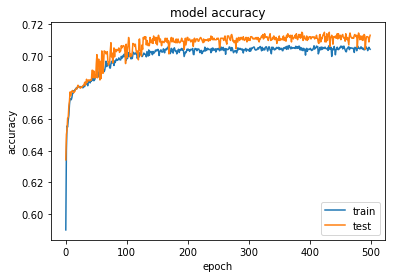

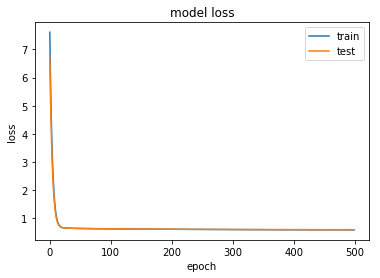

In [15]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [16]:
import sklearn
import sklearn.metrics

print(model.evaluate(xFlatTest, yTest,verbose=1))

yPred = model.predict(xFlatTest).round()


yPred
print(confusion_matrix(yTest, yPred))
print("accuracy")
print(sklearn.metrics.accuracy_score(yTest, yPred))
print("recall")
print(sklearn.metrics.recall_score(yTest, yPred))
print("precision")
print(sklearn.metrics.precision_score(yTest, yPred))


4928/5290 [==========================>...] - ETA: 0s[0.59197319225462708, 0.69735349718699613]
[[1936  699]
 [ 902 1753]]
accuracy
0.697353497164
recall
0.660263653484
precision
0.714926590538


In [17]:
# import h5py
# from h5py import file
# import cython
# serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("modelBig.h5")
# print("Saved model to disk")

model.save('modelSmall.h5')

In [95]:
np.random.randint(1000, size=(32, 10))

array([[433, 989, 986, 856, 656, 108, 426, 571, 308, 141],
       [292, 605, 764,  66, 559, 751, 242, 776, 172, 978],
       [185,  86, 696, 981, 165, 309, 256, 563, 530,  80],
       [864, 685, 816, 333, 945, 524, 333, 701, 178, 593],
       [732, 216, 998, 819, 715, 857, 653, 821, 397, 410],
       [653, 607, 808, 427, 200, 618, 618, 816, 492, 129],
       [293, 129, 414, 492,  10, 775, 750, 109, 191, 815],
       [168, 784, 658, 997, 264, 144, 646, 492, 507, 761],
       [466, 872, 472, 959, 554,  95, 237, 566, 165, 617],
       [334, 425, 773,   0, 898, 882, 926, 616, 811,  69],
       [391, 651, 321, 960, 188, 468, 408, 627, 448, 748],
       [538,  13, 277, 129, 577, 758, 355, 571, 360, 325],
       [ 60, 712, 386, 900,  58, 981,  65, 729, 697, 395],
       [338, 988, 140, 612, 672, 795, 705, 694, 589, 760],
       [685, 133, 534, 404, 553, 787, 508, 601, 895, 555],
       [821, 951, 691, 434, 873, 623, 365, 392, 713, 609],
       [220, 240, 147, 700, 622, 749, 468, 895, 454, 803